<a href="https://colab.research.google.com/github/kratikaatgithub/Stock_Price_Prediction/blob/main/Stock_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description of the app:

#!pip install --upgrade pandas-datareader

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
import matplotlib as plt
plt.style.use('dark_background')

In [ ]:
df = web.DataReader('AMZN', data_source='yahoo', start='2010-01-01', end='2020-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,6.830500,6.657000,6.812500,6.695000,151998000,6.695000
2010-01-05,6.774000,6.590500,6.671500,6.734500,177038000,6.734500
2010-01-06,6.736500,6.582500,6.730000,6.612500,143576000,6.612500
2010-01-07,6.616000,6.440000,6.600500,6.500000,220604000,6.500000
2010-01-08,6.684000,6.451500,6.528000,6.676000,196610000,6.676000
...,...,...,...,...,...,...
2019-12-24,89.778503,89.378998,89.690498,89.460503,17626000,89.460503
2019-12-26,93.523003,89.974998,90.050499,93.438499,120108000,93.438499
2019-12-27,95.070000,93.300499,94.146004,93.489998,123732000,93.489998


In [ ]:
df.shape

(2516, 6)

In [ ]:
df.head(8)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,6.8305,6.6570,6.8125,6.6950,151998000,6.6950
2010-01-05,6.7740,6.5905,6.6715,6.7345,177038000,6.7345
2010-01-06,6.7365,6.5825,6.7300,6.6125,143576000,6.6125
2010-01-07,6.6160,6.4400,6.6005,6.5000,220604000,6.5000
2010-01-08,6.6840,6.4515,6.5280,6.6760,196610000,6.6760
2010-01-11,6.6400,6.4605,6.6310,6.5155,175588000,6.5155
2010-01-12,6.4910,6.3275,6.4495,6.3675,181926000,6.3675
2010-01-13,6.4855,6.2875,6.3950,6.4555,214464000,6.4555


In [ ]:
df.isnull()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,False,False,False,False,False,False
2010-01-05,False,False,False,False,False,False
2010-01-06,False,False,False,False,False,False
2010-01-07,False,False,False,False,False,False
2010-01-08,False,False,False,False,False,False
...,...,...,...,...,...,...
2019-12-24,False,False,False,False,False,False
2019-12-26,False,False,False,False,False,False
2019-12-27,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2516 non-null   float64
 1   Low        2516 non-null   float64
 2   Open       2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Volume     2516 non-null   int64  
 5   Adj Close  2516 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


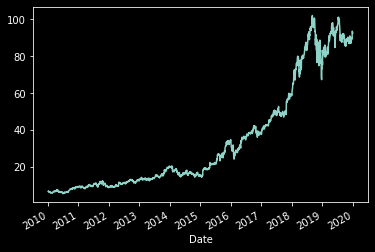

In [ ]:
df['Adj Close'].plot()

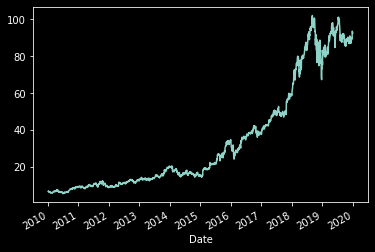

In [ ]:
df['Close'].plot()

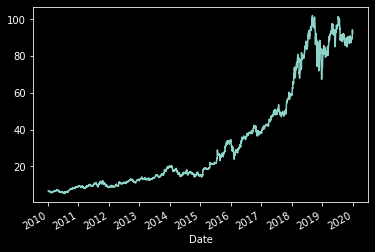

In [ ]:
df['Open'].plot()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
train_data_len = math.ceil(len(dataset)*.8)
train_data_len

2013

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01309752],
       [0.01350665],
       [0.012243  ],
       ...,
       [0.9121083 ],
       [0.90024337],
       [0.90073537]])

In [ ]:
train_data = scaled_data[0:train_data_len, :]
#Parameters above tell the starting from where data is teaking till the end and the last semicolon signifies that we will use all columns
#Just created scaled training dataset, now split data into 2 training models for independent variables/training features and dependent/target variables

In [ ]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  # if i<=61:
  #   print(x_train)
  #   print(y_train)
  #   print()

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
#Normailzing - changing shape. LSTM requires input data as 3-dimensional, but we have 2-dimensional
#The 3 dimensions - Number of samples, number of time steps and number of features
#x_train.shape - The output for the query will show the number of rows and columns to be fitted in the next query
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#The above query parameters are: Number of samples = number of rows, number of time steps = 60, number of features = 1 (closing price) 
x_train.shape

(1953, 60, 1)

In [ ]:
#The model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(BatchNormalization())
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compiling
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#Training
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1953/1953 [==============================] - 85s 41ms/step - loss: 0.0212


In [ ]:
test_data = scaled_data[train_data_len - 60: , :]
x_test = []
y_test = dataset[train_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(train_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [ ]:
#Evaluate the model - RMSE
RMSE = np.sqrt(np.mean(prediction - y_test)**2)
RMSE

47.77617159136247

In [ ]:
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = prediction
# df(train['Close']).plot
# plt.pyplot(valid[['Close', 'Predictions']])
# plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
# plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2018-01-02,59.450500,40.383678
2018-01-03,60.209999,40.361504
2018-01-04,60.479500,40.339291
2018-01-05,61.457001,40.319019
2018-01-08,62.343498,40.300392
...,...,...
2019-12-24,89.460503,37.500191
2019-12-26,93.438499,37.481003
2019-12-27,93.489998,37.456177


In [ ]:
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

[[40.38368 ]
 [40.361504]
 [40.33929 ]
 [40.31902 ]
 [40.300392]
 [40.28312 ]
 [40.264584]
 [40.243282]
 [40.218315]
 [40.190098]
 [40.158016]
 [40.12145 ]
 [40.08204 ]
 [40.041653]
 [40.00125 ]
 [39.960766]
 [39.918777]
 [39.877045]
 [39.83619 ]
 [39.798645]
 [39.76733 ]
 [39.743065]
 [39.72742 ]
 [39.720737]
 [39.725357]
 [39.741737]
 [39.769657]
 [39.80915 ]
 [39.85659 ]
 [39.908287]
 [39.95978 ]
 [40.00858 ]
 [40.054436]
 [40.097374]
 [40.13849 ]
 [40.179195]
 [40.222103]
 [40.267525]
 [40.314915]
 [40.36221 ]
 [40.408092]
 [40.45021 ]
 [40.48738 ]
 [40.520008]
 [40.54761 ]
 [40.56901 ]
 [40.586014]
 [40.60078 ]
 [40.616188]
 [40.63441 ]
 [40.65434 ]
 [40.674442]
 [40.69314 ]
 [40.70817 ]
 [40.718113]
 [40.72295 ]
 [40.72329 ]
 [40.721355]
 [40.719135]
 [40.718315]
 [40.721024]
 [40.72739 ]
 [40.73799 ]
 [40.75646 ]
 [40.78461 ]
 [40.82173 ]
 [40.86662 ]
 [40.917004]
 [40.96911 ]
 [41.01863 ]
 [41.06207 ]
 [41.09665 ]
 [41.119545]
 [41.129875]
 [41.128857]
 [41.119984]
 [41.106148]